In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import datetime

<a href="https://datarepository.wolframcloud.com/resources/Patient-Medical-Data-for-Novel-Coronavirus-COVID-19">Dataset link.</a>

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,Age,Sex,City,AdministrativeDivision,Country,GeoPosition,DateOfOnsetSymptoms,DateOfAdmissionHospital,DateOfConfirmation,Symptoms,...,TravelHistoryLocation,ReportedMarketExposure,ReportedMarketExposureComment,ChronicDiseaseQ,ChronicDiseases,SequenceAvailable,DischargedQ,DeathQ,DateOfDeath,DateOfDischarge
0,48,"Entity[""Gender"", ""Female""]","Entity[""City"", {""Wuhan"", ""Hubei"", ""China""}]","Entity[""AdministrativeDivision"", {""Hubei"", ""Ch...","Entity[""Country"", ""China""]","GeoPosition[{30.625059999999998, 114.3421}]","DateObject[{2019, 12, 10}, ""Day"", ""Gregorian"",...","DateObject[{2019, 12, 10}, ""Day"", ""Gregorian"",...","Missing[""NotAvailable""]","{""cough"", ""fatigue"", ""fever"", ""sputum"", ""myalg...",...,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",True,"{""diabetes"", ""cerebral infarction""}","Missing[""NotAvailable""]","Missing[""NotAvailable""]",True,"DateObject[{2020, 1, 20}, ""Day"", ""Gregorian"", ...","Missing[""NotAvailable""]"
1,"Interval[{15, 88}]","Entity[""Gender"", ""Female""]","Entity[""City"", {""Wuhan"", ""Hubei"", ""China""}]","Entity[""AdministrativeDivision"", {""Hubei"", ""Ch...","Entity[""Country"", ""China""]","GeoPosition[{30.625059999999998, 114.3421}]","DateObject[{2019, 12, 10}, ""Day"", ""Gregorian"",...","DateObject[{2019, 12, 31}, ""Day"", ""Gregorian"",...","Missing[""NotAvailable""]","{""shortness of breath"", ""respiratory symptoms""}",...,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",False,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",True,"Missing[""NotAvailable""]","Missing[""NotAvailable""]"
2,61,"Entity[""Gender"", ""Male""]","Entity[""City"", {""Wuhan"", ""Hubei"", ""China""}]","Entity[""AdministrativeDivision"", {""Hubei"", ""Ch...","Entity[""Country"", ""China""]","GeoPosition[{30.625059999999998, 114.3421}]","DateObject[{2019, 12, 20}, ""Day"", ""Gregorian"",...","DateObject[{2019, 12, 27}, ""Day"", ""Gregorian"",...","Missing[""NotAvailable""]","Missing[""NotAvailable""]",...,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",False,"Missing[""NotAvailable""]",True,"Missing[""NotAvailable""]",True,"DateObject[{2020, 1, 9}, ""Day"", ""Gregorian"", -5.]","Missing[""NotAvailable""]"
3,58,"Entity[""Gender"", ""Male""]","Entity[""City"", {""Wuhan"", ""Hubei"", ""China""}]","Entity[""AdministrativeDivision"", {""Hubei"", ""Ch...","Entity[""Country"", ""China""]","GeoPosition[{30.625059999999998, 114.3421}]","DateObject[{2019, 12, 22}, ""Day"", ""Gregorian"",...","DateObject[{2020, 1, 1}, ""Day"", ""Gregorian"", -5.]","Missing[""NotAvailable""]","{""cough"", ""sputum"", ""fever""}",...,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",False,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",True,"DateObject[{2020, 1, 23}, ""Day"", ""Gregorian"", ...","Missing[""NotAvailable""]"
4,66,"Entity[""Gender"", ""Male""]","Entity[""City"", {""Wuhan"", ""Hubei"", ""China""}]","Entity[""AdministrativeDivision"", {""Hubei"", ""Ch...","Entity[""Country"", ""China""]","GeoPosition[{30.625059999999998, 114.3421}]","DateObject[{2019, 12, 22}, ""Day"", ""Gregorian"",...","DateObject[{2019, 12, 31}, ""Day"", ""Gregorian"",...","Missing[""NotAvailable""]","{""cough""}",...,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",False,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",True,"DateObject[{2020, 1, 21}, ""Day"", ""Gregorian"", ...","Missing[""NotAvailable""]"


In [5]:
df.describe()

,Age,Sex,City,AdministrativeDivision,Country,GeoPosition,DateOfOnsetSymptoms,DateOfAdmissionHospital,DateOfConfirmation,Symptoms,...,TravelHistoryLocation,ReportedMarketExposure,ReportedMarketExposureComment,ChronicDiseaseQ,ChronicDiseases,SequenceAvailable,DischargedQ,DeathQ,DateOfDeath,DateOfDischarge
count,19467,19467,19467,19467,19467,19467,19467,19467,19467,19467,...,19467,19467,19467,19467,19467,19467,19467,19467,19467,19467
unique,209,3,720,463,137,1834,103,83,123,319,...,587,3,7,2,67,2,2,2,40,66
top,"Missing[""NotAvailable""]","Entity[""Gender"", ""Male""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Entity[""Country"", ""UnitedStates""]","GeoPosition[{25.6135986, -80.565963}]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","DateObject[{2020, 3, 26}, ""Day"", ""Gregorian"", ...","Missing[""NotAvailable""]",...,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",False,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]"
freq,2083,9717,12178,4226,6002,1079,15119,17601,1380,17781,...,14355,19392,19454,18717,19318,19461,19370,19317,19321,19106


#### As we can we, the dataset is rather imbalanced

In [6]:
df['DeathQ'].value_counts()

Missing["NotAvailable"]    19317
True                         150
Name: DeathQ, dtype: int64

### One hot encoding for travel history

Travel history location data is represented as a string of entities depicting the path the pacient has taken through different map points.

For a better representation we are going to represent it using one hot encoding using the unique locations as bits for the following reasons:
- we are not interested in order, just simply the locations
- it is easier to work and represent data in this way

In [7]:
# transform travel history from locations string to list of locations
travel_col = 'TravelHistoryLocation'
transform = lambda x: re.findall(r"Entity\[[^\]\[]+\]", x)
travel_lists = df[travel_col].apply(transform)
# get the unique locations found in the dataset
locs = np.concatenate(travel_lists.values)
unique_locs = np.unique(locs)
# transform travel history from list to one hot encoding
onehot = np.array([np.in1d(unique_locs, list_col) for list_col in travel_lists])
# create new dataframe using the unique locations as column headers
onehot_frame = pd.DataFrame(onehot, columns=unique_locs)
onehot_frame.head()

,"Entity[""AdministrativeDivision"", {""AbuDhabi"", ""UnitedArabEmirates""}]","Entity[""AdministrativeDivision"", {""Accra"", ""GreaterAccra"", ""Ghana""}]","Entity[""AdministrativeDivision"", {""AddisAbaba"", ""Ethiopia""}]","Entity[""AdministrativeDivision"", {""Aichi"", ""Japan""}]","Entity[""AdministrativeDivision"", {""Alabama"", ""UnitedStates""}]","Entity[""AdministrativeDivision"", {""Alberta"", ""Canada""}]","Entity[""AdministrativeDivision"", {""Alsace"", ""France""}]","Entity[""AdministrativeDivision"", {""Amsterdam"", ""NoordHolland"", ""Netherlands""}]","Entity[""AdministrativeDivision"", {""Andalo"", ""Trento"", ""TrentinoAltoAdige"", ""Italy""}]","Entity[""AdministrativeDivision"", {""Anhui"", ""China""}]",...,"Entity[""Country"", ""UnitedStates""]","Entity[""Country"", ""Uruguay""]","Entity[""Country"", ""VaticanCity""]","Entity[""Country"", ""Venezuela""]","Entity[""Country"", ""Vietnam""]","Entity[""Country"", ""Zambia""]","Entity[""Country"", ""Zimbabwe""]","Entity[""GeographicRegion"", ""Africa""]","Entity[""GeographicRegion"", ""Asia""]","Entity[""GeographicRegion"", ""Europe""]"
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# drop the old travel history column from the origin data frame
travel_dropped = df.drop(columns=['TravelHistoryLocation'], axis=1)
df = pd.concat([travel_dropped, onehot_frame], axis=1)

#### Splitting the geoposition entities into latitude and longitude, plus dropping the now redundant location features

In [9]:
# transform the geoposition column in two seperate column(lat, long)
transform = lambda x: [float(x) for x in re.findall(r"[+-]?[0-9]*[.]?[0-9]+", x)]
latlong = df['GeoPosition'].apply(transform).values
# from array of lists to ndarray
latlong = np.vstack(latlong)
latlong_frame=pd.DataFrame(latlong, columns=['Latitude', 'Longitude'])
latlong_frame.describe()

,Latitude,Longitude
count,19467.000000,19467.000000
mean,22.315788,-12.287439
std,18.706135,93.692944
min,-43.570000,-159.727596
25%,15.369250,-82.308992
50%,25.613599,-77.015390
75%,33.727220,106.174300
max,69.649468,174.740000


In [10]:
# drop redundant location columns and add the latitude/longitude frame
loc_dropped = df.drop(columns=['City', 'AdministrativeDivision', 'Country', 'GeoPosition'], axis=1)
df = pd.concat([loc_dropped, latlong_frame], axis=1)
df.head()

,Age,Sex,DateOfOnsetSymptoms,DateOfAdmissionHospital,DateOfConfirmation,Symptoms,LivesInWuhan,LivesInWuhanComment,TravelHistoryDates,ReportedMarketExposure,...,"Entity[""Country"", ""VaticanCity""]","Entity[""Country"", ""Venezuela""]","Entity[""Country"", ""Vietnam""]","Entity[""Country"", ""Zambia""]","Entity[""Country"", ""Zimbabwe""]","Entity[""GeographicRegion"", ""Africa""]","Entity[""GeographicRegion"", ""Asia""]","Entity[""GeographicRegion"", ""Europe""]",Latitude,Longitude
0,48,"Entity[""Gender"", ""Female""]","DateObject[{2019, 12, 10}, ""Day"", ""Gregorian"",...","DateObject[{2019, 12, 10}, ""Day"", ""Gregorian"",...","Missing[""NotAvailable""]","{""cough"", ""fatigue"", ""fever"", ""sputum"", ""myalg...",True,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",...,False,False,False,False,False,False,False,False,30.62506,114.3421
1,"Interval[{15, 88}]","Entity[""Gender"", ""Female""]","DateObject[{2019, 12, 10}, ""Day"", ""Gregorian"",...","DateObject[{2019, 12, 31}, ""Day"", ""Gregorian"",...","Missing[""NotAvailable""]","{""shortness of breath"", ""respiratory symptoms""}","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",...,False,False,False,False,False,False,False,False,30.62506,114.3421
2,61,"Entity[""Gender"", ""Male""]","DateObject[{2019, 12, 20}, ""Day"", ""Gregorian"",...","DateObject[{2019, 12, 27}, ""Day"", ""Gregorian"",...","Missing[""NotAvailable""]","Missing[""NotAvailable""]",True,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",...,False,False,False,False,False,False,False,False,30.62506,114.3421
3,58,"Entity[""Gender"", ""Male""]","DateObject[{2019, 12, 22}, ""Day"", ""Gregorian"",...","DateObject[{2020, 1, 1}, ""Day"", ""Gregorian"", -5.]","Missing[""NotAvailable""]","{""cough"", ""sputum"", ""fever""}",True,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",...,False,False,False,False,False,False,False,False,30.62506,114.3421
4,66,"Entity[""Gender"", ""Male""]","DateObject[{2019, 12, 22}, ""Day"", ""Gregorian"",...","DateObject[{2019, 12, 31}, ""Day"", ""Gregorian"",...","Missing[""NotAvailable""]","{""cough""}",True,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",...,False,False,False,False,False,False,False,False,30.62506,114.3421


Transforming the age entities and dealing with age intervals

In [11]:
def age_transform(data):
    numbers = re.findall(r'[0-9]+', data)
    numbers = [int(x) for x in numbers]
    if len(numbers) == 1:
        return numbers[0]
    # age interval
    return sum(numbers) >> 1

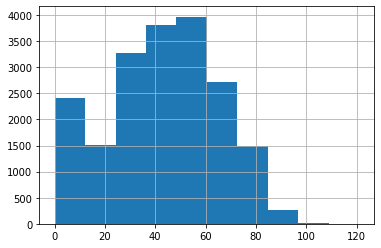

In [12]:
df['Age'] = df['Age'].apply(age_transform)
df['Age'].hist()

Transforming gender entities and filling missing data such that it mantains the initial distribution(where missing data is not counted) because it is a known fact that the disease is more prevalent among men(56% cases in the initial distribution).

In [13]:
def gender_transform(data):
    match = re.search(r"Male|Female", data)
    if not match:
        return None
    return match.group()

In [14]:
df['Sex'] = df['Sex'].apply(gender_transform)

In [15]:
counts = df['Sex'].value_counts(normalize=True)
print(counts, end="\n\n")
print(df['Sex'].describe())

Male      0.560704
Female    0.439296
Name: Sex, dtype: float64

count     17330
unique        2
top        Male
freq       9717
Name: Sex, dtype: object


In [16]:
missing = df['Sex'].isnull()
missing_size =  len(missing.index[missing == True])
print('Number of missing gender data:', missing_size)

Number of missing gender data: 2137


In [17]:
# fill missing data and mantain the distribution
fillers = ['Male' if np.random.random() <  counts.values[0] else 'Female' for _ in range(missing_size)]
df.loc[missing, 'Sex'] = fillers

In [18]:
print(df['Sex'].value_counts(normalize=True), end="\n\n")
print(df['Sex'].describe())

Male      0.561566
Female    0.438434
Name: Sex, dtype: float64

count     19467
unique        2
top        Male
freq      10932
Name: Sex, dtype: object


In [19]:
df['ReportedMarketExposure'].unique()

array(['Missing["NotAvailable"]', 'True', 'False'], dtype=object)

Computing delta(days) between DateOfAdmissionHospital and DateOfOnsetSymptoms
because data is more representative than actual dates.

Filling in missing values with the mean.

In [20]:
def date_transform(entity):
    pattern = r"[0-9]+"
    found = [int(x) for x in re.findall(pattern, entity)]
    if re.search(r'^DateInterval', entity):
        try:
            # try to find midpoint
            start = datetime.date(*found[0:3])
            end   = datetime.date(*found[3:6])
            mid = start + (end - start) / 2
            return mid
        except:
            # try and catch because of examples such this one...
            # DateInterval[{{{-Infinity, 1, 1}, {2020, 2, 25}}}, "Day", "Gregorian", -5.]
            # i mean wtf
            return np.nan
    
    if len(found) == 0: # missing data
        return np.nan
    # unpacking array to function arguments
    date = datetime.date(*found[:3])
    return date

In [21]:
adms_col  = 'DateOfAdmissionHospital'
onset_col = 'DateOfOnsetSymptoms'
delta_col = 'SymptomsAdmissionDelta'

delta_df = df[adms_col].apply(date_transform) - df[onset_col].apply(date_transform)
delta_df = delta_df.apply(lambda x: abs(x.days) if x else np.nan)
print(delta_df.describe())

count    1111.000000
mean        5.295230
std         4.880847
min         1.000000
25%         2.000000
50%         4.000000
75%         7.000000
max        50.000000
dtype: float64


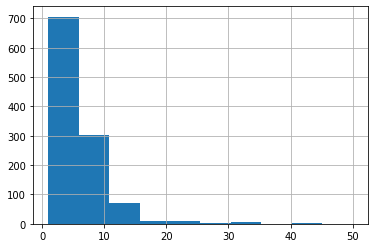

In [22]:
delta_df.hist()

In [23]:
delta_df = delta_df.fillna(delta_df.mean())
df[delta_col] = delta_df
df = df.drop(columns=[adms_col, onset_col])
df.head()

,Age,Sex,DateOfConfirmation,Symptoms,LivesInWuhan,LivesInWuhanComment,TravelHistoryDates,ReportedMarketExposure,ReportedMarketExposureComment,ChronicDiseaseQ,...,"Entity[""Country"", ""Venezuela""]","Entity[""Country"", ""Vietnam""]","Entity[""Country"", ""Zambia""]","Entity[""Country"", ""Zimbabwe""]","Entity[""GeographicRegion"", ""Africa""]","Entity[""GeographicRegion"", ""Asia""]","Entity[""GeographicRegion"", ""Europe""]",Latitude,Longitude,SymptomsAdmissionDelta
0,48,Female,"Missing[""NotAvailable""]","{""cough"", ""fatigue"", ""fever"", ""sputum"", ""myalg...",True,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",True,...,False,False,False,False,False,False,False,30.62506,114.3421,5.29523
1,51,Female,"Missing[""NotAvailable""]","{""shortness of breath"", ""respiratory symptoms""}","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",False,...,False,False,False,False,False,False,False,30.62506,114.3421,21.00000
2,61,Male,"Missing[""NotAvailable""]","Missing[""NotAvailable""]",True,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",False,...,False,False,False,False,False,False,False,30.62506,114.3421,7.00000
3,58,Male,"Missing[""NotAvailable""]","{""cough"", ""sputum"", ""fever""}",True,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",False,...,False,False,False,False,False,False,False,30.62506,114.3421,10.00000
4,66,Male,"Missing[""NotAvailable""]","{""cough""}",True,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",False,...,False,False,False,False,False,False,False,30.62506,114.3421,9.00000


### One hot encoding for symptoms

In [24]:
# transform to list of symptoms
transform = lambda x: re.findall(r"\"([a-z ]+)\"", x)
symptoms_lists = df['Symptoms'].apply(transform)
# get the unique symptoms found in the dataset
symptoms = np.concatenate(symptoms_lists.values)
symptoms = np.unique(symptoms)
onehot = np.array([np.in1d(symptoms, list_col) for list_col in symptoms_lists])
# create new dataframe using the unique symptoms as column headers
onehot_frame = pd.DataFrame(onehot, columns=symptoms)
onehot_frame.head()

,abdominal pain,acute coronary syndrome,acute kidney injury,acute left heart failure,acute myocardial infarction,acute pharyngitis,acute renal failure,acute respiratory disease,acute respiratory disease syndrome,acute respiratory distress syndrome,...,sore limbs,sore muscle,sore throat,sputum,sweating,systemic weakness,toothache,vomiting,weakness,wheezing
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


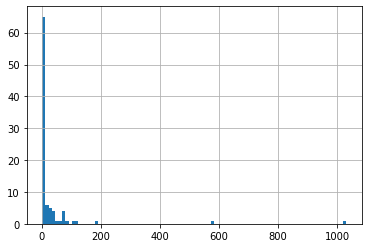

In [25]:
sum_agg = onehot_frame.astype(float).agg('sum')
sum_agg.hist(bins=92)

In [26]:
sum_agg.sort_values(ascending=False).head(15)

fever                                  1031.0
cough                                   577.0
mild symptoms                           184.0
sore throat                             118.0
pneumonia                               109.0
fatigue                                  82.0
malaise                                  79.0
headache                                 74.0
rhinorrhea                               73.0
myalgias                                 69.0
shortness of breath                      65.0
sputum                                   49.0
chills                                   41.0
pneumonitis                              40.0
acute respiratory distress syndrome      37.0
dtype: float64

In [27]:
symptoms_dropped = df.drop(columns=['Symptoms'], axis=1)
df = pd.concat([symptoms_dropped, onehot_frame], axis=1)

In [28]:
df.head()

,Age,Sex,DateOfConfirmation,LivesInWuhan,LivesInWuhanComment,TravelHistoryDates,ReportedMarketExposure,ReportedMarketExposureComment,ChronicDiseaseQ,ChronicDiseases,...,sore limbs,sore muscle,sore throat,sputum,sweating,systemic weakness,toothache,vomiting,weakness,wheezing
0,48,Female,"Missing[""NotAvailable""]",True,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",True,"{""diabetes"", ""cerebral infarction""}",...,False,False,False,True,False,False,False,False,False,False
1,51,Female,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",False,"Missing[""NotAvailable""]",...,False,False,False,False,False,False,False,False,False,False
2,61,Male,"Missing[""NotAvailable""]",True,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",False,"Missing[""NotAvailable""]",...,False,False,False,False,False,False,False,False,False,False
3,58,Male,"Missing[""NotAvailable""]",True,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",False,"Missing[""NotAvailable""]",...,False,False,False,True,False,False,False,False,False,False
4,66,Male,"Missing[""NotAvailable""]",True,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",False,"Missing[""NotAvailable""]",...,False,False,False,False,False,False,False,False,False,False


### One hot encoding for chronic diseases

In [29]:
# transform to list of symptoms
transform = lambda x: re.findall(r"\"([a-z ]+)\"", x)
diseases_lists = df['ChronicDiseases'].apply(transform)
# get the unique symptoms found in the dataset
diseases = np.concatenate(diseases_lists.values)
diseases = np.unique(diseases)
onehot = np.array([np.in1d(diseases, list_col) for list_col in diseases_lists])
# create new dataframe using the unique diseases as column headers
onehot_frame = pd.DataFrame(onehot, columns=diseases)
onehot_frame.head()

,asthma,atherosclerosis,atrial fibrillation,benign prostatic hyperplasia,benign prostatic hypertrophy,bronchial asthma,cardiac disease,cardiac dysrhythmia,cardiomyopathy,cardiovascular disease,...,on dialysis,prerenal azotemia,prostate cancer,prostate hypertrophy,stenocardia,systemic arterial hypertension,tongue cancer,tuberculosis,upper gastrointestinal bleeding,valvular heart disease
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


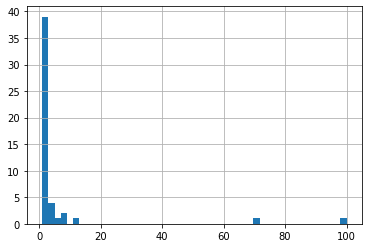

In [30]:
sum_agg = onehot_frame.astype(float).agg('sum')
sum_agg.hist(bins=49)

In [31]:
sum_agg.sort_values(ascending=False).head(10)

hypertension                             100.0
diabetes                                  70.0
chronic kidney disease                    13.0
asthma                                     9.0
coronary heart disease                     9.0
chronic obstructive pulmonary disease      7.0
cardiac disease                            5.0
kidney disease                             4.0
chronic bronchitis                         4.0
coronary stent                             4.0
dtype: float64

In [32]:
diseases_dropped = df.drop(columns=['ChronicDiseases', 'ChronicDiseaseQ'], axis=1)
df = pd.concat([diseases_dropped, onehot_frame], axis=1)

In [33]:
df.head()

,Age,Sex,DateOfConfirmation,LivesInWuhan,LivesInWuhanComment,TravelHistoryDates,ReportedMarketExposure,ReportedMarketExposureComment,SequenceAvailable,DischargedQ,...,on dialysis,prerenal azotemia,prostate cancer,prostate hypertrophy,stenocardia,systemic arterial hypertension,tongue cancer,tuberculosis,upper gastrointestinal bleeding,valvular heart disease
0,48,Female,"Missing[""NotAvailable""]",True,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",...,False,False,False,False,False,False,False,False,False,False
1,51,Female,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",...,False,False,False,False,False,False,False,False,False,False
2,61,Male,"Missing[""NotAvailable""]",True,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",True,"Missing[""NotAvailable""]",...,False,False,False,False,False,False,False,False,False,False
3,58,Male,"Missing[""NotAvailable""]",True,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",...,False,False,False,False,False,False,False,False,False,False
4,66,Male,"Missing[""NotAvailable""]",True,"Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]","Missing[""NotAvailable""]",...,False,False,False,False,False,False,False,False,False,False


In [34]:
# drop useless features
df = df.drop(columns=['LivesInWuhanComment', 'TravelHistoryDates', 
                      'ReportedMarketExposureComment', 'SequenceAvailable',
                      'DateOfConfirmation', 'DischargedQ',
                      'DateOfDeath', 'DateOfDischarge'], axis=1)

In [35]:
replacer = {'Missing["NotAvailable"]': False, 'False': False, 'True': True}
columns = ['LivesInWuhan', 'ReportedMarketExposure', 'DeathQ']

for column in columns:
    df[column] = df[column].replace(replacer)

df['Sex'] = df['Sex'].replace({'Male': False, 'Female': True})

In [36]:
print('Preprocessed dataset:')
# Convert from boolean to int notation
df = df * 1
df.head()

Preprocessed dataset:


,Age,Sex,LivesInWuhan,ReportedMarketExposure,DeathQ,"Entity[""AdministrativeDivision"", {""AbuDhabi"", ""UnitedArabEmirates""}]","Entity[""AdministrativeDivision"", {""Accra"", ""GreaterAccra"", ""Ghana""}]","Entity[""AdministrativeDivision"", {""AddisAbaba"", ""Ethiopia""}]","Entity[""AdministrativeDivision"", {""Aichi"", ""Japan""}]","Entity[""AdministrativeDivision"", {""Alabama"", ""UnitedStates""}]",...,on dialysis,prerenal azotemia,prostate cancer,prostate hypertrophy,stenocardia,systemic arterial hypertension,tongue cancer,tuberculosis,upper gastrointestinal bleeding,valvular heart disease
0,48,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,51,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,61,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,58,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,66,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
#correlation_mat = df.corr()

As expected, the features are not strongly correlated, apart from chronic diseases/symptoms as seen in the bottom right corner(they were the last ones appended to the dataframe).

In [38]:
#plt.matshow(correlation_mat)

In [39]:
df_x = df.drop('DeathQ', axis=1).copy()
df_y = df['DeathQ'].copy()

In [40]:
minmax_scaling = lambda x: (x - x.min()) / (x.max() - x.min())

#### Scale number features between 0 and 1

In [41]:
nbr_cols = ['Age', 'SymptomsAdmissionDelta', 'Latitude', 'Longitude']

for col in nbr_cols:
    df_x[col] = minmax_scaling(df_x[col])

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, train_test_split, validation_curve
from sklearn import metrics
import seaborn as sns

In [43]:
X = df_x.values
y = df_y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(n_jobs=-1, verbose=1, random_state=42, max_iter=100,  penalty='l2', C=5.5)
model.fit(X_train, y_train)

#kfolding = KFold(n_splits=10, shuffle=True, random_state=42)
#score = cross_val_score(model, X, y, n_jobs=4, cv=kfolding, scoring="accuracy")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   10.7s finished


LogisticRegression(C=5.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=1, warm_start=False)

In [44]:
model.score(X_test, y_test)

0.9961479198767335

In [45]:
#predictions = model.predict_proba(X_test)

In [46]:
#metrics.log_loss(y, predictions)

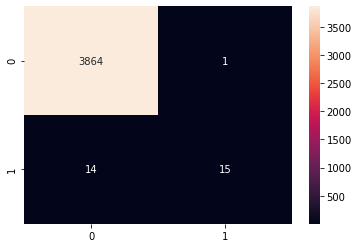

In [47]:
y_pred = model.predict(X_test)
conf = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, fmt='d')

In [48]:
def compute_f1_scores_4conf_mat(conf_mat):
  table = []
  n = conf_mat.shape[0]

  for i in range(n):
    correct = conf_mat[i, i]
    precision = correct / conf_mat[:, i].sum()
    recall    = correct / conf_mat[i, :].sum()
    f1 = 2 * precision * recall / (precision + recall)
    table.append([precision, recall, f1])
  return np.array(table)

In [49]:
compute_f1_scores_4conf_mat(conf)

array([[0.99638989, 0.99974127, 0.99806277],
       [0.9375    , 0.51724138, 0.66666667]])

#### Trying to unsample negative entries

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [51]:
df_train = pd.concat([pd.DataFrame(X_train), 
                      pd.DataFrame(y_train, columns=['y'])], 
                      axis=1)

In [52]:
neg = df_train[df_train['y'] == 0]
pos = df_train[df_train['y'] == 1]

In [53]:
neg_downsampled = resample(neg,
 replace=True, # sample with replacement
 n_samples=len(pos) * 3,
 random_state=42)

In [54]:
downsampled = pd.concat([neg_downsampled, pos])
downsampled['y'].value_counts()

0    363
1    121
Name: y, dtype: int64

In [55]:
X_train = downsampled.drop(columns=['y']).copy()
y_train = downsampled['y'].copy()
model2 = LogisticRegression(n_jobs=-1, verbose=1, random_state=42, max_iter=100,  penalty='l2', C=5.5)
model2.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


LogisticRegression(C=5.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=1, warm_start=False)

In [56]:
model2.score(X_test, y_test)

0.9915254237288136

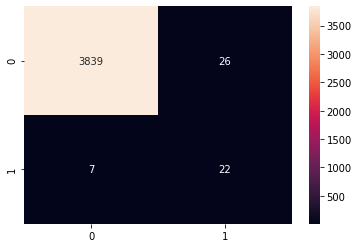

In [57]:
y_pred = model2.predict(X_test)
conf = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, fmt='d')

In [58]:
compute_f1_scores_4conf_mat(conf)

array([[0.99817993, 0.99327296, 0.9957204 ],
       [0.45833333, 0.75862069, 0.57142857]])

#### Trying different class weights

In [59]:
X = df_x.values
y = df_y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)
class_weights = {0: 1e-2, 1: 99e-2}
model3 = LogisticRegression(n_jobs=-1, verbose=1, 
                           random_state=42, max_iter=100,  
                           penalty='l2', C=1.5, class_weight=class_weights)
model3.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.4s finished


LogisticRegression(C=1.5, class_weight={0: 0.01, 1: 0.99}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [60]:
model3.score(X_test, y_test)

0.9861325115562404

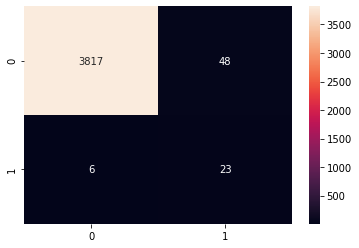

In [61]:
y_pred = model3.predict(X_test)
conf = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, fmt='d')

In [62]:
compute_f1_scores_4conf_mat(conf)

array([[0.99843055, 0.98758085, 0.99297607],
       [0.32394366, 0.79310345, 0.46      ]])

#### Ensambling resampled datasets

In [63]:
df_train = pd.concat([pd.DataFrame(X_train), 
                      pd.DataFrame(y_train, columns=['y'])], 
                      axis=1)
                      
neg = df_train[df_train['y'] == 0]
pos = df_train[df_train['y'] == 1]

#### Using the a 1:4 pos/neg ratio

In [64]:
ratio = 4
count = np.ceil(len(neg) / len(pos) / ratio)
print(f'Will ensemble {count} models')

Will ensemble 32.0 models


In [65]:
neg_shuffled = neg.values
np.random.shuffle(neg_shuffled)
neg_partitions = np.array_split(neg_shuffled, count, axis=0)

In [66]:
print(len(neg_partitions), neg_partitions[0].shape)

32 (483, 511)


In [67]:
def best_partition_model(neg_partitions, pos):
    best = (None, 1e-10)
    for index, partition in enumerate(neg_partitions, start=0):
        dataset = np.concatenate((partition, pos.values), axis=0)
        # drop the y column
        y = dataset[:,  -1]
        X = dataset[:, :-1]
        np.random.shuffle(X_train)
        model = LogisticRegression(n_jobs=-1, verbose=0, random_state=42, 
                                   max_iter=100,  penalty='l2', C=2.5)
        model.fit(X, y)

        y_pred = model.predict(X_test)
        conf = metrics.confusion_matrix(y_test, y_pred)
        scores = compute_f1_scores_4conf_mat(conf)
        recall = scores[1, 1] # recall score for positive class

        if recall > best[1]:
            best = (model, recall)
        if index % 10 == 0:
            print(f'Progress: {index} / {count}')
    return best

In [68]:
best = best_partition_model(neg_partitions, pos)
print(best)

Progress: 0 / 32.0
Progress: 10 / 32.0
Progress: 20 / 32.0
Progress: 30 / 32.0
(LogisticRegression(C=2.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), 0.7241379310344828)


In [69]:
best[0].score(X_test, y_test)

0.9899845916795069

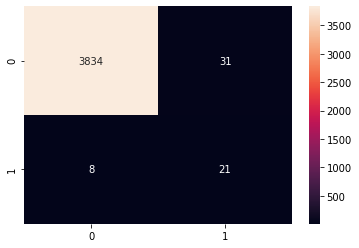

In [70]:
conf = metrics.confusion_matrix(y_test, best[0].predict(X_test))
sns.heatmap(conf, annot=True, fmt='d')

In [71]:
compute_f1_scores_4conf_mat(conf)

array([[0.99791775, 0.9919793 , 0.99493967],
       [0.40384615, 0.72413793, 0.51851852]])

#### Use K-Nearest-Neighbors for ensembling datasets

In [72]:
from sklearn.cluster import KMeans

In [73]:
kmeans = KMeans(n_clusters=31, random_state=42, 
                n_jobs=-1, max_iter=100, verbose=1)

In [74]:
kmeans.fit(neg.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=31, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=1)

In [77]:
kmeans.labels_, kmeans.labels_.shape, kmeans.n_clusters

(array([ 5,  4,  0, ..., 25,  0, 25], dtype=int32), (15452,), 31)

In [82]:
partitions = [neg.values[np.in1d(kmeans.labels_, cluster), :] for cluster in range(kmeans.n_clusters)]

In [85]:
print(' '.join([str(x.shape) for x in partitions]))

(1745, 511) (1204, 511) (152, 511) (247, 511) (1961, 511) (2000, 511) (1444, 511) (185, 511) (544, 511) (276, 511) (316, 511) (153, 511) (128, 511) (132, 511) (247, 511) (725, 511) (260, 511) (157, 511) (39, 511) (205, 511) (107, 511) (138, 511) (83, 511) (76, 511) (91, 511) (2205, 511) (142, 511) (139, 511) (155, 511) (132, 511) (64, 511)


In [87]:
best2 = best_partition_model(partitions, pos)
print(best)

Progress: 0 / 32.0
Progress: 10 / 32.0
Progress: 20 / 32.0
Progress: 30 / 32.0
(LogisticRegression(C=2.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), 0.7241379310344828)


In [89]:
best2[0].score(X_test, y_test)

0.049563430919363126

#### Perfect recall for positive results, horrible accuracy and f1 scores

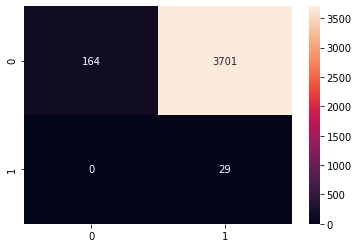

In [88]:
conf = metrics.confusion_matrix(y_test, best2[0].predict(X_test))
sns.heatmap(conf, annot=True, fmt='d')

In [90]:
compute_f1_scores_4conf_mat(conf)

array([[1.        , 0.04243208, 0.08140978],
       [0.0077748 , 1.        , 0.01542964]])